In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('./AH2023_Sylvania_1yr.csv')
df.head()

,Date time,Swdown,Lwdown,Rainf,Tair,Qair,Wind,Psurf,Ccov,Rnet,Qle,Qh,Qle (LSM),Qh (LSM)
0,2002/01/01 01:00,0.0,216.675,0.0,258.501,0.001170,2.588,94390.867,0.145,-29.267,0.833,-21.168,2.456,59.579
1,2002/01/01 01:30,0.0,216.936,0.0,258.576,0.001181,2.490,94392.797,0.132,-21.540,0.186,-13.835,1.922,46.012
2,2002/01/01 02:00,0.0,217.215,0.0,258.660,0.001192,2.320,94394.953,0.240,-22.932,0.296,-1.749,1.563,35.741
3,2002/01/01 02:30,0.0,218.276,0.0,258.992,0.001227,2.214,94403.469,0.211,-11.259,1.723,-12.495,1.247,26.644
4,2002/01/01 03:00,0.0,218.888,0.0,259.183,0.001247,2.344,94408.359,0.654,-28.586,1.821,-13.398,1.048,22.566


In [54]:
days = 2*24*6
Swdown = df['Swdown'][:days]
Tair = df['Tair'][:days]
Qle = df['Qle'][:days]
Qh = df['Qh'][:days]
date = [datetime.strptime(date_time,"%Y/%m/%d %H:%M") for date_time in df['Date time'][:days]]

In [16]:
#find relationship
def plot_scatter(var1,var2,title='title',savename='./png/test.png'):
    fig,ax = plt.subplots(figsize=(4,4))
    ax.scatter(var1,var2)
    ax.set_title(title)
    #ax.set_aspect('equal')
    ax.set_xlim(min(var1)-10,max(var1)+10)
    plt.show()
    fig.savefig(savename)

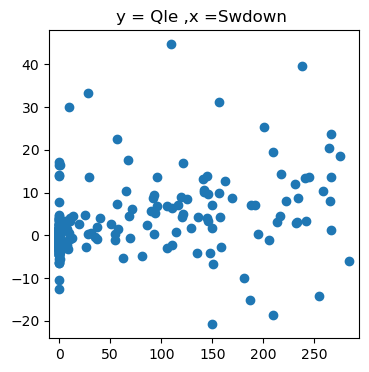

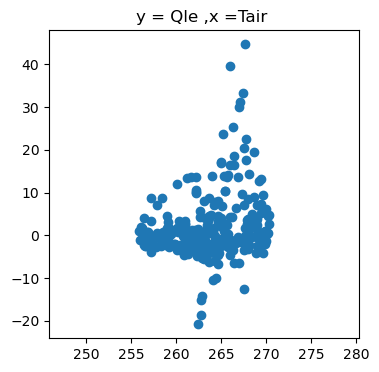

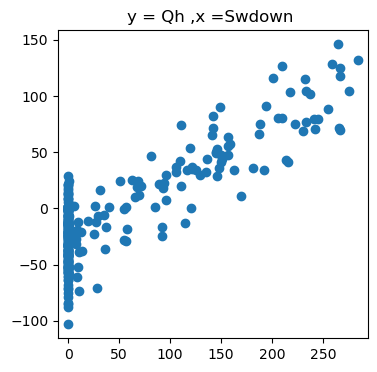

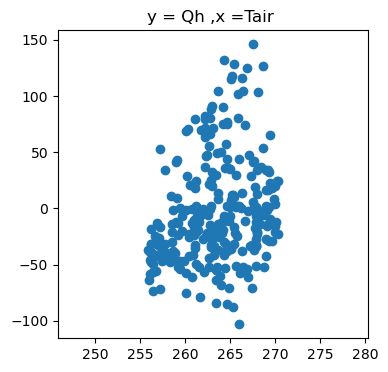

In [17]:
# relationship 
plot_scatter(Swdown,Qle,title='y = Qle ,x =Swdown ',savename='./png/scatter_le_sdown.png')
plot_scatter(Tair,Qle,title='y = Qle ,x =Tair ',savename='./png/scatter_le_temp.png')
plot_scatter(Swdown,Qh,title='y = Qh ,x =Swdown ',savename='./png/scatter_h_sdown.png')
plot_scatter(Tair,Qh,title='y = Qh ,x =Tair ',savename='./png/scatter_h_temp.png')

In [46]:
# linear regression
def linear_regression(x,y):
    model = LinearRegression()
    try:
        x = x.reshape(-1,1)
    except:
        x = np.array(x)
        x = x.reshape(-1,1)
    model.fit(x,y)
    # 回帰係数を表示
    print('回帰係数:', model.coef_)
    # 切片を表示
    print('切片:', model.intercept_)
    return model.coef_[0],model.intercept_

def single(var1,var2,title='title',savename='./png/test.png'):
    #linear regression
    coef,intercept = linear_regression(var1[:2*24*3],var2[:2*24*3])
    lineared_var2 = var1[2*24*3:] * coef + intercept
    
    #plot
    fig,ax = plt.subplots(2,1)
    ax[0].plot(var2[:],label='Truth')
    ax[0].plot(lineared_var2,label='simulation')
    ax[0].set_title(title)
    ax[1].plot((var2[:]-lineared_var2)[144:])
    ax[1].set_xlim(0,288)
    ax[1].set_title("Difference (Truth-Simulation)")
    plt.tight_layout()
    ax[0].legend();plt.show()
    fig.savefig(savename)

回帰係数: [0.50628622]
切片: -35.508454030435544


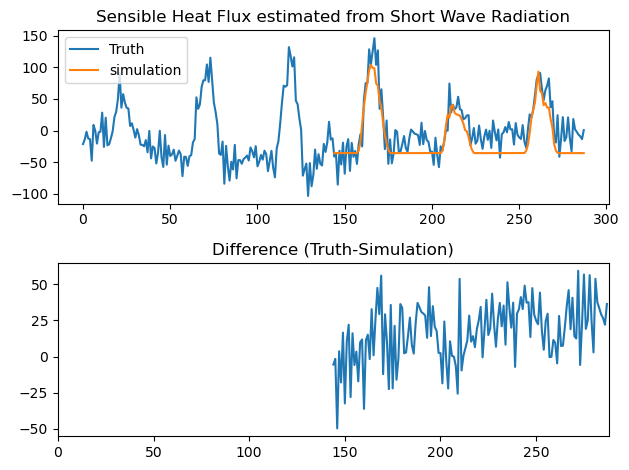

回帰係数: [5.06034952]
切片: -1332.8368791293885


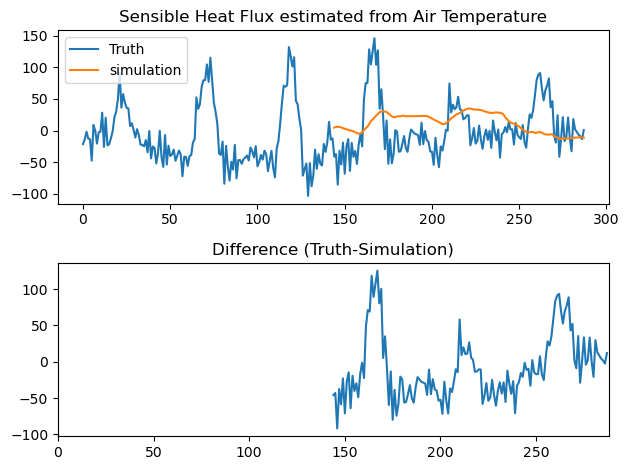

回帰係数: [0.03672505]
切片: 1.5422560810505859


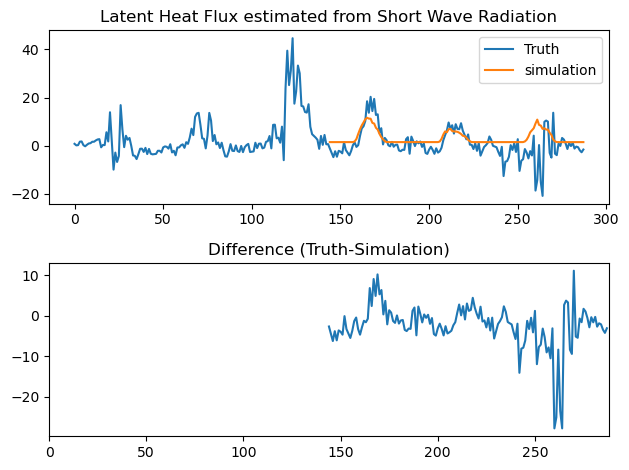

回帰係数: [1.312096]
切片: -339.46350878873864


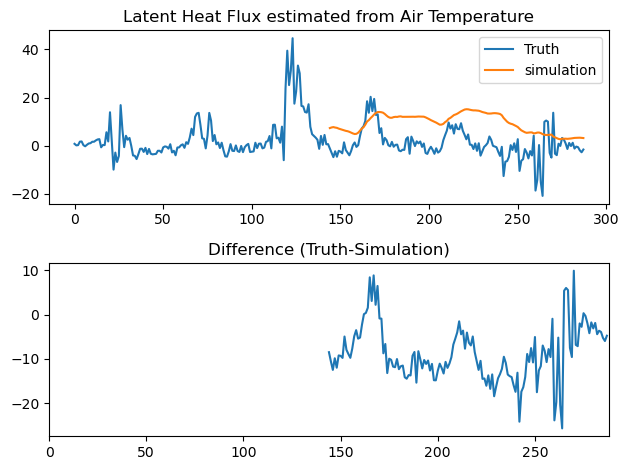

In [47]:
single(Swdown,Qh,title='Sensible Heat Flux estimated from Short Wave Radiation',savename='./png/linear_h_sdown.png')
single(Tair,Qh,title='Sensible Heat Flux estimated from Air Temperature',savename='./png/linear_h_tair.png')
single(Swdown,Qle,title='Latent Heat Flux estimated from Short Wave Radiation',savename='./png/linear_le_sdown.png')
single(Tair,Qle,title='Latent Heat Flux estimated from Air Temperature',savename='./png/linear_le_tair.png')

In [8]:
#plotting does not work currently
#also calculate multi regression
def plot_3d(x1,x2,y):
    model_lr = LinearRegression()
    obs = np.array([x1,x2]).T
    model_lr.fit(obs, y)
    print(model_lr.coef_)
    print(model_lr.intercept_)
    return model_lr.coef_[0],model_lr.coef_[1],model_lr.intercept_

In [101]:
def plot_multi_regression(x1,x2,y,title='title',savename='savename'):   
    #multi regression
    model_lr = LinearRegression()
    #obs = np.array([x1[:3*24*2],x2[:3*24*2]]).T
    obs = np.array([x1[48*180:48*183],x2[48*180:48*183]]).T
    #model_lr.fit(obs, y[:3*24*2])
    model_lr.fit(obs, y[48*180:48*183])
    print(f"変数1の係数: {model_lr.coef_[0]},変数2の係数: {model_lr.coef_[1]},切片: {model_lr.intercept_}")
    coef_x1,coef_x2,const=model_lr.coef_[0],model_lr.coef_[1],model_lr.intercept_
    #est = x1[:3*24*2] *coef_x1 + x2[:3*24*2] * coef_x2 + const
    trained = x1[48*183:48*186] *coef_x1 + x2[48*183:48*186] * coef_x2 + const
    print

    #plot
    fig,ax = plt.subplots(2,1)
    ax[0].plot(date[48*180:48*186],y[48*180:48*186],label='Truth')
    ax[0].plot(date[48*183:48*186],trained,label='simulation')
    ax[0].set_title(title)
    ax[1].plot((y[:]-trained)[48*183:])
    #ax[1].set_xlim(0,288)
    ax[1].set_title("Difference (Truth-Simulation)")
    plt.tight_layout()
        
    ax[0].xaxis.set_major_formatter(mdates.DateFormatter("%m/%d\n%H:%M"))
    #ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%d"))
    
    ax[0].legend();plt.show()

    fig.savefig(savename)

#idea 時間で色分けしてみる

In [98]:
plot_multi_regression(Tair,Swdown,Qh,title='Sensible Heat Flux Multi Regression',savename='./png/Qh_multi.png')
plot_multi_regression(Tair,Swdown,Qle,title='Latenet Heat Flux Multi Regression',savename='./png/Qle_multi.png')

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required by LinearRegression.

変数1の係数: -7.384975561644636,変数2の係数: 0.29900222313947805,切片: 2144.577406614298


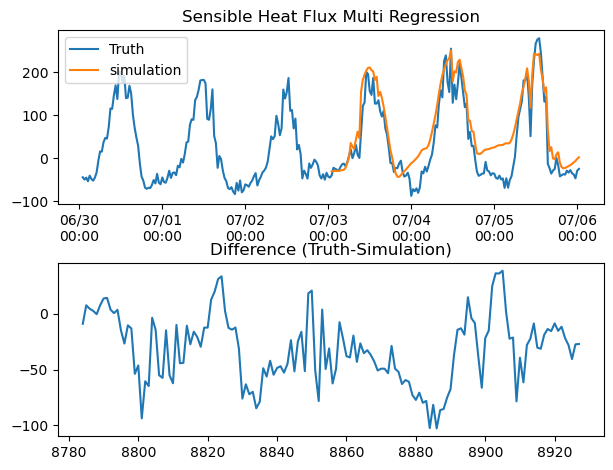

変数1の係数: 17.9608262123593,変数2の係数: 0.2489250262040441,切片: -5324.079965719673


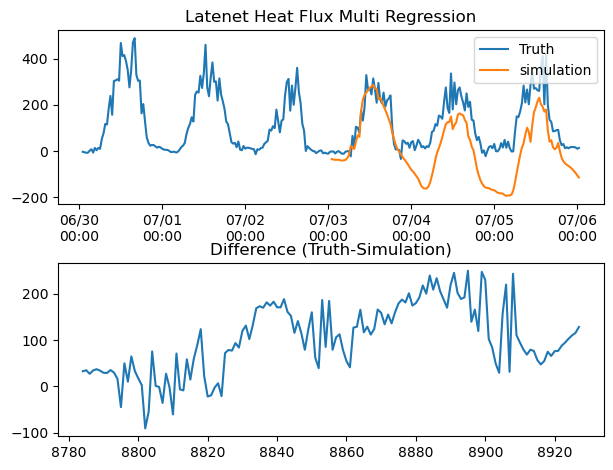

In [103]:
date = [datetime.strptime(date_time,"%Y/%m/%d %H:%M") for date_time in df['Date time']]
plot_multi_regression(df['Tair'],df['Swdown'],df['Qh'],title='Sensible Heat Flux Multi Regression',savename='./png/Qh_multi_summer.png')
plot_multi_regression(df['Tair'],df['Swdown'],df['Qle'],title='Latenet Heat Flux Multi Regression',savename='./png/Qle_multi_summer.png')